In [1]:
# Import required modules 
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb 

In [3]:
matplotlib.is_interactive()

True

In [2]:
matplotlib.__version__

'3.0.2'

In [4]:
matplotlib.get_backend()

'module://ipykernel.pylab.backend_inline'

In [6]:
tips = sb.load_dataset('tips')

# Bar Graph

In [11]:
total_bills = tips.groupby('day',as_index=False)['total_bill'].sum()
total_bills

,day,total_bill
0,Thur,1096.33
1,Fri,325.88
2,Sat,1778.40
3,Sun,1627.16


<BarContainer object of 4 artists>

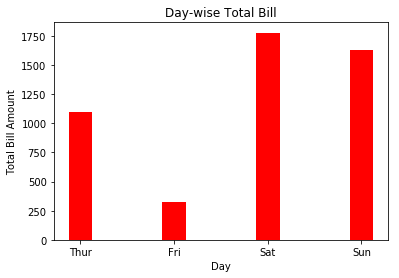

In [20]:
# Draw a bar graph
plt.xlabel("Day")
plt.ylabel("Total Bill Amount")
plt.title("Day-wise Total Bill")
plt.bar(x = total_bills['day'], height = total_bills['total_bill'] , width=0.25, color='red')

<BarContainer object of 4 artists>

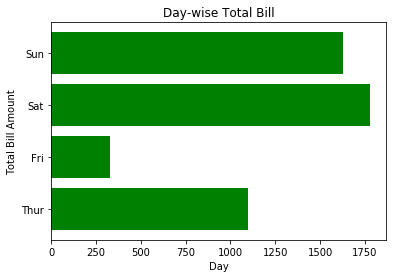

In [24]:
# Draw a horizontal bar graph
plt.xlabel("Day")
plt.ylabel("Total Bill Amount")
plt.title("Day-wise Total Bill")
plt.barh( y = total_bills['day'], width = total_bills['total_bill'] ,color='green')

## Line Graph

Text(0.5, 1.0, 'Total Bill Per Day')

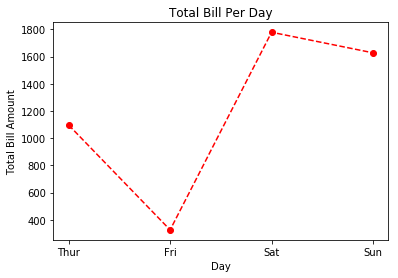

In [30]:
# Draw a line graph
plt.plot(total_bills['day'].tolist(),total_bills['total_bill'],'ro--')
plt.xlabel("Day")
plt.ylabel("Total Bill Amount")
plt.title("Total Bill Per Day")

Text(0.5, 1.0, 'Total Bill Per Day')

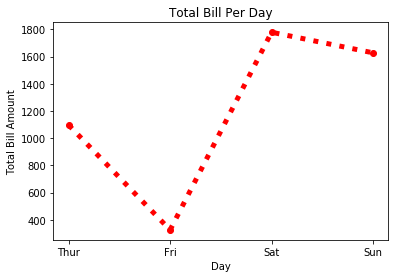

In [36]:
# Draw a line graph
plt.plot(total_bills['day'].tolist(),total_bills['total_bill'], 
         color='red', marker='o', linestyle='dotted', linewidth=5)
plt.xlabel("Day")
plt.ylabel("Total Bill Amount")
plt.title("Total Bill Per Day")

In [37]:
## draw for multiple values, with legend 
total = tips.groupby('day')['total_bill','tip'].sum()
total

,total_bill,tip
day,,
Thur,1096.33,171.83
Fri,325.88,51.96
Sat,1778.40,260.40
Sun,1627.16,247.39


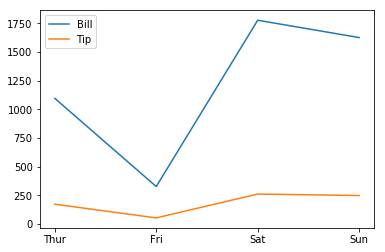

In [38]:
plt.plot(total.index.tolist(),total)
plt.legend(['Bill','Tip'])

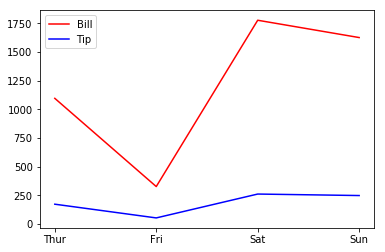

In [42]:
plt.plot(total.index.tolist(),total['total_bill'], label="Bill", color='red')
plt.plot(total.index.tolist(),total['tip'], label="Tip", color='blue')
plt.legend()

## Creating two plots for each value

Text(0.5, 1.0, 'Bill Amount')

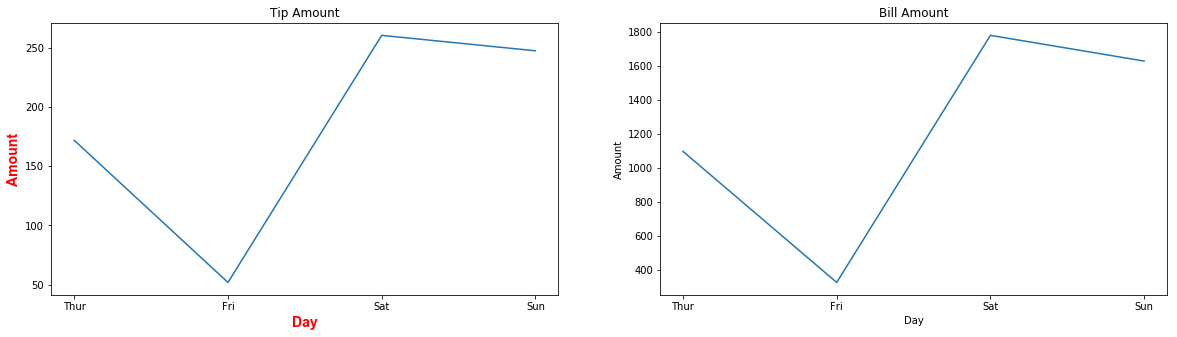

In [52]:
font = {'family': 'arial',
        'color':  'red',
        'weight': 'bold',
        'size': 14,
        }
total = tips.groupby('day')['total_bill','tip'].sum()
(fig,(ax1,ax2)) = plt.subplots(1,2)
fig.set_size_inches(20,5)
ax1.plot(total.index.tolist(), total['tip'])
ax1.set_xlabel("Day", fontdict=font)
ax1.set_ylabel("Amount", fontdict=font)
ax1.set_title("Tip Amount")
ax2.plot(total.index.tolist(), total['total_bill'])
ax2.set_xlabel("Day")
ax2.set_ylabel("Amount")
ax2.set_title("Bill Amount")

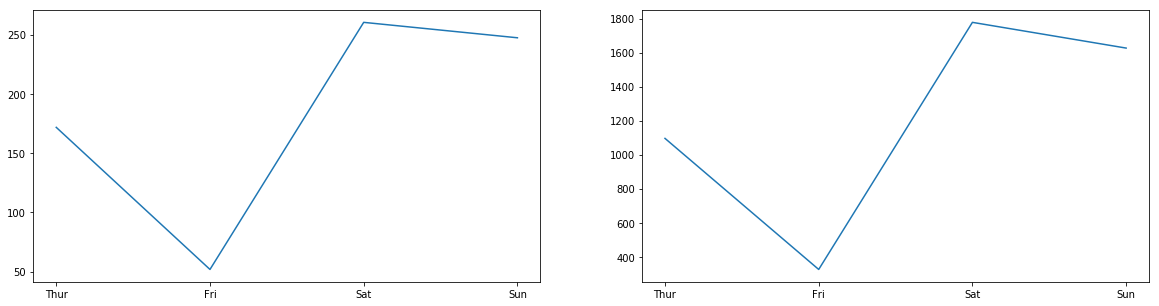

In [12]:
total = tips.groupby('day')['total_bill','tip'].sum()
(fig,ax) = plt.subplots(1,2)
fig.set_size_inches(20,5)
ax[0].plot(total.index.tolist(), total['tip'])
ax[1].plot(total.index.tolist(), total['total_bill'])

# Histogram

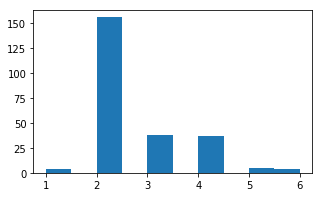

In [54]:
# draw histogram of number of persons
plt.hist(tips['size'])
plt.gcf().set_size_inches(5,3)

## Scatter plot

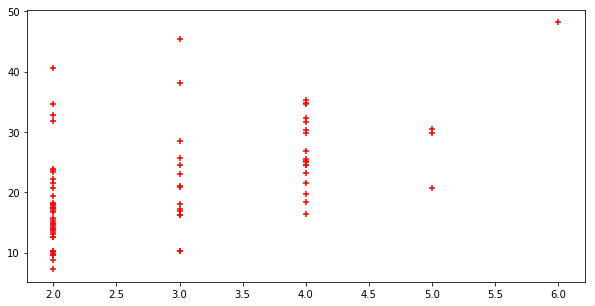

In [14]:
# draw Scatter plot of size and total bill
sun_total = tips.loc[ tips['day'] == 'Sun']
sat_total = tips.loc[ tips['day'] == 'Sat']
plt.scatter(x = sun_total['size'], y=sun_total['total_bill'], marker='+', color='red')
#plt.scatter(x = sat_total['size'], y=sat_total['total_bill'], marker='o')
plt.gcf().set_size_inches(10,5)
#plt.legend(['Sunday','Saturday'])

# Pie chart of day-wise total

In [15]:
day_total = tips.groupby('day')['total_bill'].sum()

([<matplotlib.patches.Wedge at 0x1a25334b38>,
 [Text(0.8317418198604141, 0.7198649492059512, 'Thur'),
  Text(-0.07485481766878774, 1.0974501156188252, 'Fri'),
  Text(-1.0902316372510155, 0.14627021958338043, 'Sat'),
  Text(0.5388644448471241, -0.9589708598698924, 'Sun')],
 [Text(0.4536773562874985, 0.3926536086577916, '22.71'),
  Text(-0.04082990054661149, 0.5986091539739046, ' 6.75'),
  Text(-0.5946718021369175, 0.07978375613638933, '36.84'),
  Text(0.29392606082570405, -0.5230750144744867, '33.70')])

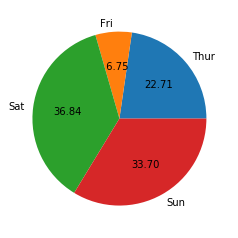

In [16]:
plt.pie(day_total.values, labels= day_total.index, autopct='%5.2f')

## Stacked Bars of total bill for male and female 

In [31]:
male_totals = tips[ tips['sex'] =='Male'].groupby(['day'], as_index=False)['total_bill'].sum()
female_totals = tips[ tips['sex'] =='Female'].groupby(['day'], as_index=False)['total_bill'].sum()
male_totals

,day,total_bill
0,Thur,561.44
1,Fri,198.57
2,Sat,1227.35
3,Sun,1269.46


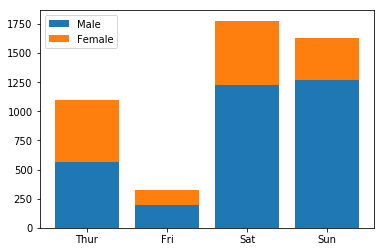

In [36]:
plt.bar(x = male_totals['day'], height = male_totals['total_bill'], label="Male")
plt.bar(x = female_totals['day'], height = female_totals['total_bill'], bottom = male_totals['total_bill'], label="Female")
plt.legend()

### Multiple bars in bar graph

([<matplotlib.axis.XTick at 0x1a25b25898>,
 <a list of 4 Text xticklabel objects>)

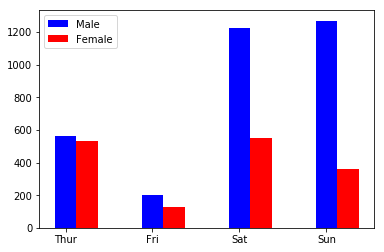

In [50]:
male_totals = tips[ tips['sex'] =='Male'].groupby(['day'], as_index=False)['total_bill'].sum()
female_totals = tips[ tips['sex'] =='Female'].groupby(['day'], as_index=False)['total_bill'].sum()
X = np.arange(4)
plt.bar(X + 0.00, male_totals['total_bill'], color = 'b', width = 0.25 , label="Male")
plt.bar(X + 0.25, female_totals['total_bill'], color = 'r', width = 0.25, label="Female")
plt.legend()
plt.xticks(X, male_totals['day'])

## Stacked Bar Graph

## Watermark

Text(0, 200, 'Srikanth Technologies')

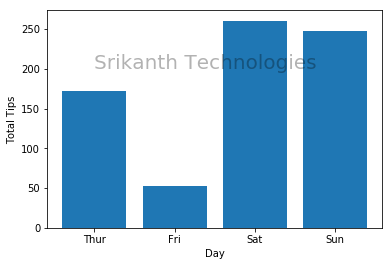

In [63]:
total_tips = tips.groupby('day', as_index=False)['tip'].sum()
total_tips
ax = plt.subplot()
ax.bar(total_tips['day'], total_tips['tip'])
ax.set_xlabel("Day")
ax.set_ylabel("Total Tips")
ax.text(0,200,"Srikanth Technologies", fontsize="20", alpha=0.3)

## Draw Scatter plot with regression line 

In [69]:
df = pd.read_csv("Admission.csv")
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [66]:
df = df.loc[:,  ['GRE Score','TOEFL Score']].head(20)

In [67]:
X = df['GRE Score']
Y = df['TOEFL Score']

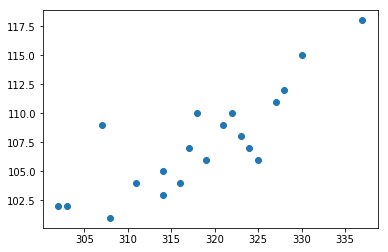

In [68]:
plt.scatter(x=df['GRE Score'], y=df['TOEFL Score'])

In [71]:
from scipy import stats

In [72]:
slope, intercept, r_value, p_value, std_err = stats.linregress(df["GRE Score"], df['TOEFL Score'])

In [73]:
line = slope * X + intercept

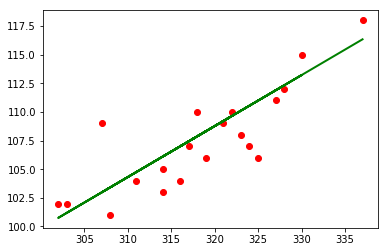

In [74]:
plt.plot(X,Y,'ro',X,line, 'g', linewidth=2)   # format is x,y, format, x,y,format , **kwargs

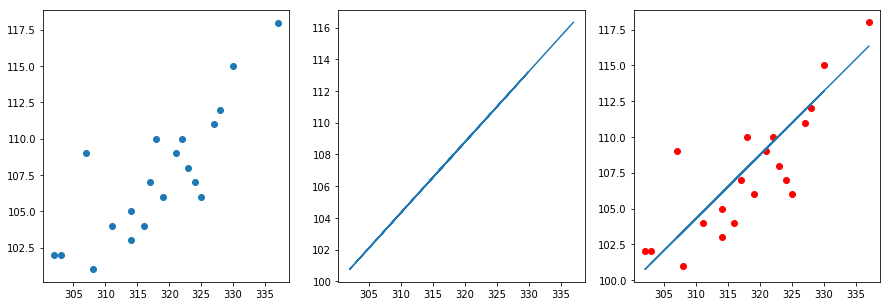

In [75]:
fig,ax = plt.subplots(1,3)
fig.set_size_inches(15,5)
ax[0].scatter(X,Y)
ax[1].plot(X,line)
ax[2].plot(X,Y,'ro', X,line)

## Box plot

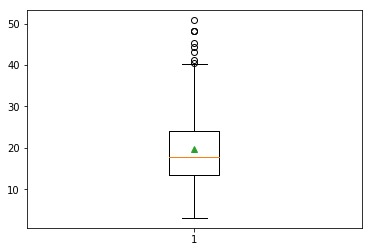

In [84]:
total_bills = tips['total_bill']
p = plt.boxplot(total_bills, showmeans=True)

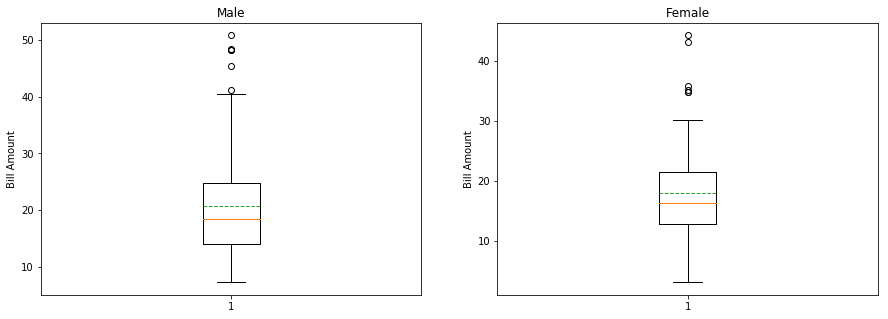

In [94]:
# Distribution of Total bill mount by sex 
male_totals = tips.loc [ tips['sex'] =='Male', ['total_bill']]
female_totals = tips.loc [ tips['sex'] =='Female', ['total_bill']]
fig,ax = plt.subplots(1,2)
fig.set_size_inches(15,5)
 
ax[0].boxplot(male_totals['total_bill'], meanline=True,  showmeans=True)
ax[0].set_ylabel("Bill Amount")
ax[0].set_title("Male")
ax[1].boxplot( female_totals['total_bill'], meanline=True,  showmeans=True)
ax[1].set_ylabel("Bill Amount")
ax[1].set_title("Female")
plt.show()